In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt


from lamp import *
from lamp.models import *
from lamp.utils import *

## Linear Regression

In [2]:
a = round(rd.random() * 100, 2)
sigma = a / 2

xtrain = np.linspace(0, 2, 100).reshape(-1, 1)
ytrain = xtrain * a + np.random.uniform(-sigma, sigma, (100,1))


In [3]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain, nb_iter=1000, gradient_step=1e-5)

coef: 11.63
predicted: 11.44


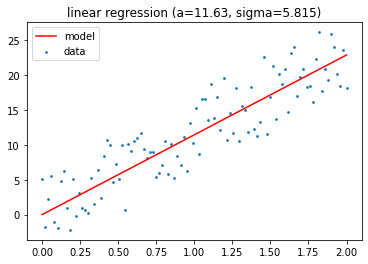

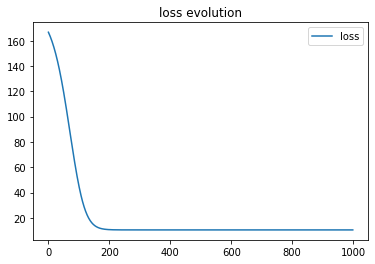

In [10]:
ahat = round(linreg.net._parameters[0][0], 2)
print(f"coef: {a}\npredicted: {ahat}")

plt.figure()
plt.title(f"linear regression (a={a}, sigma={sigma})")
plt.scatter(xtrain, ytrain, s=3, label="data")
plt.plot(xtrain, ahat * xtrain, color='red', label="model")
plt.legend()

plt.figure()
plt.title("loss evolution")
plt.plot(linreg.loss_list, label="loss")
plt.legend()

plt.show()

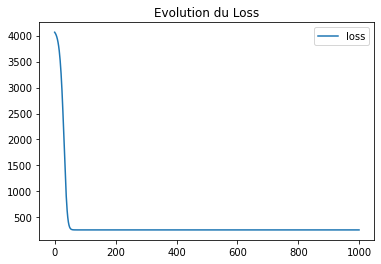

## Non-Linear

In [11]:
datax, datay = gen_arti(data_type=1)
datay = np.where(datay == -1, 0, 1)
print(f"batch : {datax.shape[0]}")

batch : 1000


score: 0.999


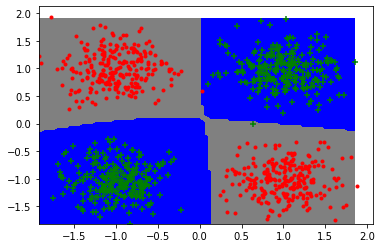

In [12]:
nonlin = NonLinear()
nonlin.fit(datax, datay, hidden_size=20, nb_iter=1000, gradient_step=1e-3)
yhat = nonlin.predict(datax)
print(f"score: {nonlin.score(datax, datay)}")

plot_frontiere(datax, nonlin.predict, step=100)
plot_data(datax, datay.flatten())
plt.show()

score: 0.999


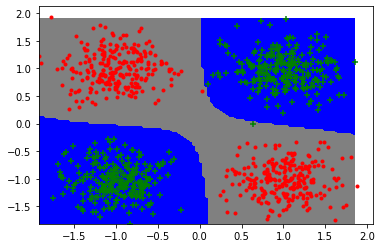

In [13]:
nonlin = NonLinear()
nonlin.fit(datax, datay, hidden_size=20, nb_iter=2000, gradient_step=1e-3, batch_size=100)
yhat = nonlin.predict(datax)
print(f"score: {nonlin.score(datax, datay)}")

plot_frontiere(datax, nonlin.predict, step=100)
plot_data(datax, datay.flatten())
plt.show()

## Multi class

In [2]:
def confusion_matrix(yhat, datay, n_classes=10):
    C = np.zeros((n_classes, n_classes))

    for i in range(yhat.size):
        C[yhat[i], datay[i]] += 1

    C /= C.sum(axis=1, keepdims=1)

    return C


In [3]:
classes = list(range(10))
trainx, trainy = get_usps(classes, *load_usps("../data/USPS_train.txt"))
testx, testy = get_usps(classes, *load_usps("../data/USPS_test.txt"))

onehot = np.zeros((trainy.size, 10))
onehot[np.arange(trainy.size), trainy] = 1

In [4]:
mc = MultiClass()
mc.fit(trainx, onehot, hidden=100, nb_iter=100, gradient_step=1e-2)

In [5]:
trainyhat = mc.predict(trainx)
trainscore = round(mc.score(trainx, trainy), 2)
cm1 = confusion_matrix(trainyhat, trainy)

testyhat = mc.predict(testx)
testscore = round(mc.score(testx, testy), 2)
cm2 = confusion_matrix(testyhat, testy)

cms = [cm1, cm2]
titles = [f"training score: {trainscore}", f"testing score: {testscore}"]

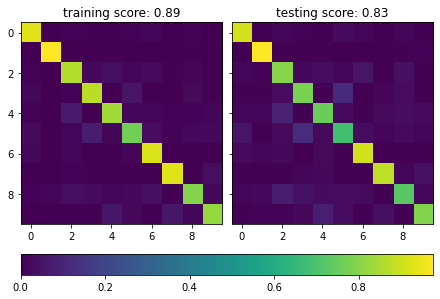

In [6]:
fig = plt.figure(constrained_layout=True)

axes = fig.subplots(nrows=1, ncols=2, sharey=True)
for ax, cm, title in zip(axes, cms, titles):
    im = ax.imshow(cm)
    ax.set_title(title)

fig.colorbar(im, ax=axes, location='bottom')
plt.show()


In [7]:
mc = MultiClass()
mc.fit(trainx, onehot, hidden=100, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

In [8]:
trainyhat = mc.predict(trainx)
trainscore = round(mc.score(trainx, trainy), 2)
cm1 = confusion_matrix(trainyhat, trainy)

testyhat = mc.predict(testx)
testscore = round(mc.score(testx, testy), 2)
cm2 = confusion_matrix(testyhat, testy)

cms = [cm1, cm2]
titles = [f"training score: {trainscore}", f"testing score: {testscore}"]

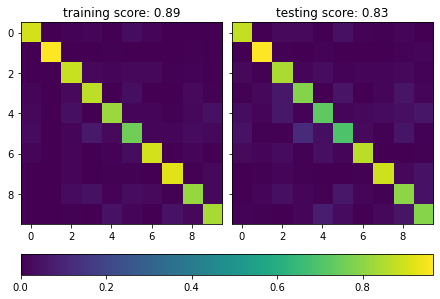

In [9]:
fig = plt.figure(constrained_layout=True)
axes = fig.subplots(nrows=1, ncols=2, sharey=True)
for ax, cm, title in zip(axes, cms, titles):
    im = ax.imshow(cm)
    ax.set_title(title)

fig.colorbar(im, ax=axes, location='bottom')
plt.show()


## Compression

In [6]:
classes = list(range(10))
trainx, trainy = get_usps(classes, *load_usps("../data/USPS_train.txt"))
testx, testy = get_usps(classes, *load_usps("../data/USPS_test.txt"))

onehot = np.zeros((trainy.size, 10))
onehot[np.arange(trainy.size), trainy] = 1

In [3]:
ae = AutoEncoder()
ae.fit(trainx, onehot, hidden=100, nb_iter=100, gradient_step=1e-4)

In [7]:
def analyse_compression(model, datax):
    decoded = model.predict(datax)

    examples = np.random.choice(datax.shape[0], 8)

    ind = 1
    for x in examples:
        plt.subplot(4,4,ind)
        show_usps(datax[x])
        plt.subplot(4,4,ind+1)
        show_usps(decoded[x])
        ind += 2

    plt.show()

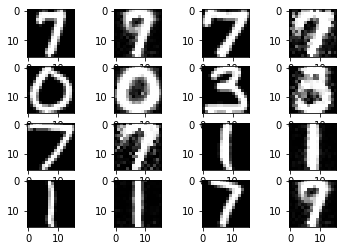

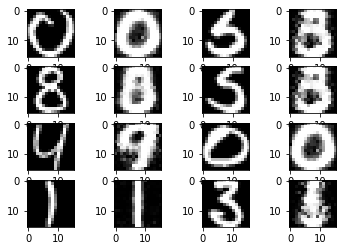

In [8]:
analyse_compression(ae, trainx)
analyse_compression(ae, testx)

In [4]:
ae = AutoEncoder()
ae.fit(trainx, onehot, hidden=100, nb_iter=100, gradient_step=1e-4, batch_size=1000)

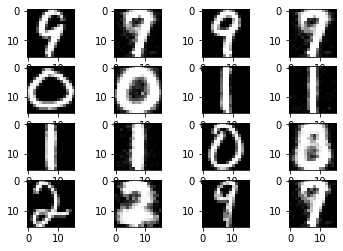

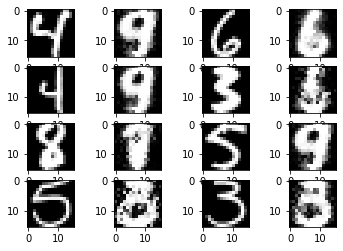

In [9]:
analyse_compression(ae, trainx)
analyse_compression(ae, testx)